# TAREA 4 - DERIVADOS FINANCIEROS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as si
import warnings
from datetime import datetime
import math

# Configuración de visualización
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
warnings.filterwarnings('ignore')

print("Librerías importadas correctamente. Entorno listo para simulación sin TWS.")

Librerías importadas correctamente. Entorno listo para simulación sin TWS.


Las tres celdas que se ven a continuación han sido recicladas del ejercicio anterior para poder realizar este ejercicio. Como podemos ver, debido a la imposibilidad de conectarnos a TWS de Interactive Brokers, hemos creado un dataframe de la cadena de opciones para así simular la interfaz de TWS.

In [2]:
data = {
    "strike": [666, 667, 668, 669, 670, 671, 672, 673, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 697, 698],
    "call_bid": [24.45, 23.44, 22.56, 21.68, 20.90, 19.97, 19.13, 18.28, 17.41, 16.65, 15.79, 15.00, 14.22, 13.44, 12.67, 11.91, 11.19, 10.47, 9.77, 9.10, 8.48, 7.86, 7.25, 6.66, 6.10, 5.57, 5.07, 4.59, 4.14, 3.73, 3.34, 2.97, 2.64],
    "call_ask": [24.78, 23.96, 23.05, 22.17, 21.15, 20.31, 19.43, 18.59, 17.75, 16.86, 16.05, 15.23, 14.42, 13.65, 12.81, 12.11, 11.36, 10.66, 9.94, 9.22, 8.54, 7.88, 7.27, 6.68, 6.12, 5.59, 5.08, 4.61, 4.16, 3.74, 3.35, 2.99, 2.66],
    "call_open_interest": [66, 46, 29, 0, 38, 4, 16, 39, 8, 165, 30, 24, 77, 30, 3270, 8, 51, 103, 493, 499, 96, 436, 1700, 291, 2930, 302, 241, 172, 971, 2510, 642, 466, 648],
    "call_delta": [0.851, 0.843, 0.834, 0.825, 0.816, 0.805, 0.794, 0.783, 0.771, 0.759, 0.745, 0.731, 0.716, 0.701, 0.684, 0.666, 0.648, 0.629, 0.609, 0.588, 0.567, 0.545, 0.522, 0.498, 0.474, 0.449, 0.425, 0.400, 0.375, 0.350, 0.325, 0.301, 0.277],
    "call_gamma": [0.010, 0.011, 0.011, 0.012, 0.012, 0.013, 0.014, 0.014, 0.015, 0.015, 0.016, 0.017, 0.017, 0.018, 0.019, 0.020, 0.020, 0.021, 0.021, 0.022, 0.023, 0.023, 0.023, 0.024, 0.024, 0.024, 0.024, 0.024, 0.024, 0.024, 0.023, 0.023, 0.022],
    "call_vega": [0.376, 0.377, 0.378, 0.395, 0.441, 0.448, 0.449, 0.450, 0.452, 0.504, 0.513, 0.514, 0.516, 0.526, 0.564, 0.566, 0.569, 0.571, 0.598, 0.601, 0.604, 0.607, 0.611, 0.614, 0.618, 0.598, 0.602, 0.606, 0.570, 0.568, 0.572, 0.537, 0.515],
    "call_theta": [-0.228, -0.225, -0.223, -0.222, -0.219, -0.243, -0.240, -0.237, -0.235, -0.233, -0.251, -0.248, -0.245, -0.242, -0.259, -0.250, -0.247, -0.244, -0.243, -0.245, -0.241, -0.239, -0.235, -0.231, -0.229, -0.218, -0.215, -0.213, -0.196, -0.193, -0.191, -0.171, -0.168],
    "put_bid": [1.83, 1.93, 2.04, 2.15, 2.27, 2.40, 2.54, 2.68, 2.84, 3.01, 3.19, 3.37, 3.58, 3.80, 4.03, 4.27, 4.54, 4.82, 5.13, 5.45, 5.80, 6.17, 6.56, 6.99, 7.44, 7.84, 8.34, 8.88, 9.45, 10.01, 10.57, 11.32, 11.91],
    "put_ask": [1.85, 1.95, 2.05, 2.17, 2.29, 2.42, 2.56, 2.70, 2.86, 3.02, 3.20, 3.39, 3.60, 3.81, 4.05, 4.29, 4.56, 4.84, 5.15, 5.47, 5.82, 6.19, 6.59, 7.01, 7.46, 8.01, 8.52, 9.07, 9.65, 10.24, 10.90, 11.58, 12.33],
    "put_open_interest": [73, 257, 44, 249, 10400, 111, 24, 54, 217, 1050, 148, 1150, 481, 156, 5340, 59, 1570, 236, 335, 4500, 298, 317, 639, 255, 1070, 145, 22, 40, 4, 19, 106, 17, 21],
    "put_delta": [-0.151, -0.159, -0.168, -0.177, -0.187, -0.198, -0.209, -0.220, -0.232, -0.245, -0.260, -0.274, -0.290, -0.305, -0.323, -0.341, -0.360, -0.380, -0.401, -0.422, -0.445, -0.468, -0.487, -0.515, -0.541, -0.567, -0.594, -0.621, -0.649, -0.676, -0.704, -0.731, -0.760],
    "put_gamma": [0.010, 0.011, 0.012, 0.012, 0.013, 0.013, 0.014, 0.014, 0.015, 0.016, 0.017, 0.017, 0.018, 0.019, 0.019, 0.020, 0.021, 0.022, 0.022, 0.023, 0.024, 0.024, 0.025, 0.025, 0.026, 0.026, 0.026, 0.026, 0.026, 0.026, 0.026, 0.025, 0.025],
    "put_vega": [0.378, 0.379, 0.381, 0.401, 0.444, 0.449, 0.451, 0.453, 0.457, 0.508, 0.514, 0.517, 0.519, 0.533, 0.565, 0.568, 0.571, 0.575, 0.598, 0.601, 0.603, 0.605, 0.607, 0.609, 0.610, 0.590, 0.590, 0.588, 0.556, 0.545, 0.539, 0.502, 0.475],
    "put_theta": [-0.142, -0.140, -0.138, -0.136, -0.136, -0.157, -0.155, -0.152, -0.150, -0.149, -0.166, -0.163, -0.160, -0.158, -0.169, -0.166, -0.163, -0.161, -0.165, -0.162, -0.159, -0.157, -0.153, -0.150, -0.147, -0.138, -0.135, -0.132, -0.118, -0.115, -0.111, -0.095, -0.092]
}

df_spy = pd.DataFrame(data)

# Calculamos mid prices para Calls y Puts
df_spy['call_mid'] = (df_spy['call_bid'] + df_spy['call_ask']) / 2
df_spy['put_mid'] = (df_spy['put_bid'] + df_spy['put_ask']) / 2

# PARAMETROS DE MERCADO (CALIBRADOS/ESTIMADOS)
# En el notebook original estos se sacan de IB. Aquí los definimos manual o derivados.
# T = 18 días según tu info previa. r = 4% (usado en el notebook ejemplo).
T_days = 18
T = T_days / 365.0
r = 0.04 # 4% Risk Free Rate del notebook
q = 0.00 # 0% Dividend Yield del notebook

# Estimación de S0 (Spot) usando paridad Put-Call en el Strike 689 (ATM)
# C - P = S*exp(-qT) - K*exp(-rT)  => S = (C - P + K*exp(-rT)) / exp(-qT)
row_atm = df_spy[df_spy['strike'] == 689].iloc[0]
S0 = (row_atm['call_mid'] - row_atm['put_mid'] + 689 * math.exp(-r * T))
# Redondeamos S0 para usarlo como referencia
print(f"Datos cargados. Spot estimado (S): {S0:.2f}, Vencimiento (T): {T:.4f} años")

Datos cargados. Spot estimado (S): 687.31, Vencimiento (T): 0.0493 años


In [3]:
# ============================================================
# Ejercicio 4 (ADAPTADO): Comparativa IV (Black-Scholes vs QuantLib)
# Fuente de datos: DataFrame (df_spy)
# ============================================================

import math
from datetime import datetime

# --- Importaciones condicionales (Mantenemos esto del original) ---
try:
    import QuantLib as ql
    HAS_QL = True
except ImportError:
    HAS_QL = False

try:
    import yfinance as yf
    HAS_YF = True
except ImportError:
    HAS_YF = False

# ------------------------------------------------------------
# 1) Funciones Financieras (Idénticas al original)
# ------------------------------------------------------------

def norm_cdf(x: float) -> float:
    return 0.5 * (1.0 + math.erf(x / math.sqrt(2.0)))

def get_risk_free_rate_yahoo(default: float = 0.045) -> float:
    """Obtiene la tasa libre de riesgo actual (T-Bill 13 sem) de Yahoo."""
    if not HAS_YF: return default
    try:
        # Intentamos obtener datos reales, si falla usamos default
        ticker = yf.Ticker("^IRX")
        hist = ticker.history(period="5d")
        if not hist.empty:
            return float(hist["Close"].iloc[-1] / 100.0)
    except Exception:
        pass
    return default

def calculate_implied_q(S: float, K: float, T: float, r: float, priceC: float, priceP: float) -> float:
    """Calcula Dividend Yield (q) implícito por Paridad Put-Call."""
    if S <= 0 or T <= 0: return 0.0
    rhs = priceC - priceP + K * math.exp(-r * T)
    if rhs <= 0: return 0.0
    return -(1.0 / T) * math.log(rhs / S)

def bs_price(S, K, T, r, q, sigma, right):
    if S <= 0 or K <= 0 or T <= 0 or sigma <= 0: return float("nan")
    d1 = (math.log(S/K) + (r - q + 0.5*sigma**2)*T) / (sigma*math.sqrt(T))
    d2 = d1 - sigma*math.sqrt(T)
    if right.upper() == "C":
        return math.exp(-q*T)*S*norm_cdf(d1) - math.exp(-r*T)*K*norm_cdf(d2)
    else:
        return math.exp(-r*T)*K*norm_cdf(-d2) - math.exp(-q*T)*S*norm_cdf(-d1)

def implied_vol_bisect(price_mkt, S, K, T, r, q, right, lo=1e-4, hi=4.0):
    if not (math.isfinite(price_mkt) and price_mkt > 0): return float("nan")
    # Filtro básico de arbitraje
    intrinsic = max(0, S*math.exp(-q*T) - K*math.exp(-r*T)) if right == "C" else max(0, K*math.exp(-r*T) - S*math.exp(-q*T))
    if price_mkt < intrinsic: return float("nan")

    f_lo = bs_price(S, K, T, r, q, lo, right) - price_mkt
    f_hi = bs_price(S, K, T, r, q, hi, right) - price_mkt
    if (f_lo * f_hi > 0) or not (math.isfinite(f_lo) and math.isfinite(f_hi)): return float("nan")

    for _ in range(100):
        mid = 0.5 * (lo + hi)
        f_mid = bs_price(S, K, T, r, q, mid, right) - price_mkt
        if abs(f_mid) < 1e-6: return mid
        if f_lo * f_mid <= 0: hi = mid; f_hi = f_mid
        else: lo = mid; f_lo = f_mid
    return 0.5 * (lo + hi)

def iv_quantlib_american(price_mkt, S, K, expiry_yyyymmdd, r, q, right):
    """Cálculo IV Americana usando QuantLib."""
    if not HAS_QL or not (math.isfinite(price_mkt) and price_mkt > 0):
        return float("nan"), "QL N/A"

    try:
        today = ql.Date.todaysDate()
        ql.Settings.instance().evaluationDate = today
        
        # Parseamos la fecha string (ej: "20260126")
        exp = ql.DateParser.parseFormatted(expiry_yyyymmdd, "%Y%m%d")
        
        day_count = ql.Actual365Fixed()
        calendar = ql.UnitedStates(ql.UnitedStates.NYSE)

        opt_type = ql.Option.Call if right.upper() == "C" else ql.Option.Put
        payoff = ql.PlainVanillaPayoff(opt_type, K)
        exercise = ql.AmericanExercise(today, exp)
        option = ql.VanillaOption(payoff, exercise)

        spot_h = ql.QuoteHandle(ql.SimpleQuote(S))
        r_ts = ql.YieldTermStructureHandle(ql.FlatForward(today, r, day_count))
        q_ts = ql.YieldTermStructureHandle(ql.FlatForward(today, q, day_count))
        
        # Volatilidad inicial dummy para el proceso
        vol0 = ql.BlackVolTermStructureHandle(ql.BlackConstantVol(today, calendar, 0.20, day_count))
        process = ql.BlackScholesMertonProcess(spot_h, q_ts, r_ts, vol0)

        if hasattr(ql, "BaroneAdesiWhaleyApproximationEngine"):
            option.setPricingEngine(ql.BaroneAdesiWhaleyApproximationEngine(process))
            eng = "QL BAW"
        else:
            option.setPricingEngine(ql.BinomialVanillaEngine(process, "crr", 100))
            eng = "QL Binomial"

        iv = option.impliedVolatility(price_mkt, process, 1e-4, 100, 1e-4, 4.0)
        return float(iv), eng
    except Exception as e:
        return float("nan"), f"QL Err"


In [4]:
import math
from datetime import datetime, timedelta

# --- Importaciones condicionales ---
try:
    import QuantLib as ql
    HAS_QL = True
except ImportError:
    HAS_QL = False

# ------------------------------------------------------------
# 1) MATEMÁTICAS FINANCIERAS (Griegas Manuales - Black-Scholes)
# ------------------------------------------------------------

def norm_cdf(x):
    """Función de distribución acumulada normal."""
    return 0.5 * (1.0 + math.erf(x / math.sqrt(2.0)))

def norm_pdf(x):
    """Función de densidad de probabilidad normal."""
    return (1.0 / math.sqrt(2.0 * math.pi)) * math.exp(-0.5 * x * x)

def bs_greeks_manual(S, K, T, r, q, sigma, right):
    """
    Calcula Griegas europeas manualmente (Black-Scholes).
    Uso:
       - Delta Hedging (Punto 2): Usa res['delta']
       - Análisis de Riesgos (Punto 5): Usa res['gamma'], res['vega'], res['theta']
    """
    res = {"iv": sigma, "delta": float("nan"), "gamma": float("nan"),
           "vega": float("nan"), "theta": float("nan"), "rho": float("nan")}

    # Validaciones básicas
    if S <= 0 or K <= 0 or T <= 0 or sigma <= 0: return res

    d1 = (math.log(S / K) + (r - q + 0.5 * sigma ** 2) * T) / (sigma * math.sqrt(T))
    d2 = d1 - sigma * math.sqrt(T)
    
    # Pre-cálculos comunes
    nd1 = norm_cdf(d1)
    n_d1 = norm_pdf(d1)
    eqT = math.exp(-q * T)
    erT = math.exp(-r * T)
    sqrtT = math.sqrt(T)

    # Gamma y Vega son idénticos para Call y Put
    res["gamma"] = (eqT * n_d1) / (S * sigma * sqrtT)
    res["vega"]  = (S * eqT * n_d1 * sqrtT) / 100.0  # Vega escalada estándar (/100)

    if right.upper() == "C":
        nd2 = norm_cdf(d2)
        res["delta"] = eqT * nd1
        
        # Theta Call (Time decay diario)
        term1 = -(S * eqT * n_d1 * sigma) / (2 * sqrtT)
        term2 = - r * K * erT * nd2
        term3 = + q * S * eqT * nd1
        res["theta"] = (term1 + term2 + term3) / 365.0
        
        # Rho Call
        res["rho"]   = (K * T * erT * nd2) / 100.0
        
    else: # PUT
        n_md2 = norm_cdf(-d2)
        nd1_neg = norm_cdf(-d1)
        
        res["delta"] = eqT * (nd1 - 1.0) # Delta negativo
        
        # Theta Put
        term1 = -(S * eqT * n_d1 * sigma) / (2 * sqrtT)
        term2 = + r * K * erT * n_md2
        term3 = - q * S * eqT * nd1_neg
        res["theta"] = (term1 + term2 + term3) / 365.0
        
        # Rho Put
        res["rho"]   = (-K * T * erT * n_md2) / 100.0

    return res

def implied_vol_bisect(price, S, K, T, r, q, right):
    """
    Calcula la Volatilidad Implícita (IV) a partir del precio de mercado.
    Necesaria si tu DataFrame no tiene columna de IV o si quieres recalcularla.
    """
    def price_bs(s):
        d1 = (math.log(S/K) + (r - q + 0.5*s**2)*T) / (s*math.sqrt(T))
        d2 = d1 - s*math.sqrt(T)
        if right.upper() == "C": 
            return math.exp(-q*T)*S*norm_cdf(d1) - math.exp(-r*T)*K*norm_cdf(d2)
        else:
            return math.exp(-r*T)*K*norm_cdf(-d2) - math.exp(-q*T)*S*norm_cdf(-d1)

    if price <= 0: return float("nan")
    
    # Bisección simple
    lo, hi = 1e-4, 4.0
    for _ in range(50):
        mid = (lo+hi)/2
        p = price_bs(mid)
        if abs(p - price) < 1e-4: return mid
        if p > price: hi = mid
        else: lo = mid
    return (lo+hi)/2

# ------------------------------------------------------------
# 2) QuantLib Griegas (Opcional - Modelo Americano)
# ------------------------------------------------------------

def ql_greeks_american_simulated(price, S, K, expiry_str, r, q, right, time_fraction):
    """
    Calcula Griegas Americanas usando QuantLib (más preciso para SPY, pero más lento).
    """
    res = {"iv": float("nan"), "delta": float("nan"), "gamma": float("nan"),
           "vega": float("nan"), "theta": float("nan"), "rho": float("nan")}

    if not HAS_QL or price <= 0: return res

    try:
        # Convertimos fecha string a objeto Date de QL
        exp_date_ql = ql.DateParser.parseFormatted(str(expiry_str), "%Y%m%d")
        
        # Simulamos la fecha de valoración restando T días a la expiración
        days_to_maturity = int(time_fraction * 365)
        calculation_date = exp_date_ql - days_to_maturity
        
        ql.Settings.instance().evaluationDate = calculation_date

        opt_type = ql.Option.Call if right.upper() == "C" else ql.Option.Put
        payoff = ql.PlainVanillaPayoff(opt_type, float(K))
        exercise = ql.AmericanExercise(calculation_date, exp_date_ql)

        spot_handle = ql.QuoteHandle(ql.SimpleQuote(float(S)))
        day_count = ql.Actual365Fixed()
        r_ts = ql.YieldTermStructureHandle(ql.FlatForward(calculation_date, float(r), day_count))
        q_ts = ql.YieldTermStructureHandle(ql.FlatForward(calculation_date, float(q), day_count))

        # 1. Calcular IV Implícita (Barone-Adesi-Whaley)
        option_calc = ql.VanillaOption(payoff, exercise)
        vol_dummy = ql.BlackVolTermStructureHandle(ql.BlackConstantVol(calculation_date, ql.UnitedStates(ql.UnitedStates.NYSE), 0.20, day_count))
        process_calc = ql.BlackScholesMertonProcess(spot_handle, q_ts, r_ts, vol_dummy)
        option_calc.setPricingEngine(ql.BaroneAdesiWhaleyApproximationEngine(process_calc))
        
        try:
            iv = option_calc.impliedVolatility(float(price), process_calc, 1e-4, 100, 1e-4, 4.0)
        except RuntimeError:
            return res
        res["iv"] = iv

        # 2. Calcular Griegas (Bjerksund-Stensland)
        option_greeks = ql.VanillaOption(payoff, exercise)
        vol_final = ql.BlackVolTermStructureHandle(ql.BlackConstantVol(calculation_date, ql.UnitedStates(ql.UnitedStates.NYSE), iv, day_count))
        process_final = ql.BlackScholesMertonProcess(spot_handle, q_ts, r_ts, vol_final)
        option_greeks.setPricingEngine(ql.BjerksundStenslandApproximationEngine(process_final))

        res["delta"] = option_greeks.delta()
        res["gamma"] = option_greeks.gamma()
        res["vega"]  = option_greeks.vega() / 100.0
        res["theta"] = option_greeks.theta() / 365.0
        res["rho"]   = option_greeks.rho() / 100.0 

    except Exception:
        pass

    return res

## **1. Construir una estrategia concreta con opciones: long straddle periódico sobre SPY.**

En este apartado construimos y analizamos la estrategia Long Straddle. Dado que partimos de un dataset estático (una cadena de opciones de un día concreto), utilizamos una Simulación de Montecarlo para proyectar el comportamiento de esta estrategia en 1000 futuros posibles durante los próximos 18 días.

### **1.1. Calibración del Mercado Real**
Antes de simular, anclamos nuestro modelo a la realidad utilizando los datos del DataFrame ``df_spy``:

- **Coste Real de Entrada:** Calculamos cuánto costaría hoy montar la estrategia sumando las primas mid-price reales del Call y Put ATM (Strike 689).
- **Volatilidad Implícita ($\sigma$):** Para la volatilidad hemos usado un algoritmo de bisección (``implied_vol_bisect``), el cual hemos reciclado del código del ejercicio hecho por el profesor, y que nos sirve para deducir qué volatilidad está descontando el mercado en los precios actuales. Esto asegura que nuestra simulación se mueva con la misma velocidad que espera el mercado.

### **1.2. Mecánica de la Estrategia**
El Long Straddle es una estrategia de volatilidad, neutral en cuanto a la dirección del mercado (Delta $\approx$ 0).

* **Posición:** Compra de 1 Call + Compra de 1 Put (mismo Strike K y mismo Vencimiento T).
* **Tesis de Inversión:** Esperamos un movimiento fuerte del subyacente en cualquier dirección, perderíamos si el mercado se mantiene lateral.
* **Perfil de Riesgo:**
    * **Pérdida Máxima:** Limitada a la prima pagada, si el precio termina exactamente en el Strike K.
    * **Beneficio Máximo:** Ilimitado, teóricamente, si el mercado se mueve lo suficiente.

### **1.3. Motor de Simulación (Montecarlo)**
Generamos 1000 escenarios aleatorios para el precio final del SPY ($S_T$) al vencimiento ($t=18 días$) utilizando el modelo de Movimiento Browniano Geométrico: $$S_T = S_0 \cdot e^{(r - 0.5\sigma^2)T + \sigma\sqrt{T}Z}$$
Donde $Z$ es una variable aleatoria normal estándar. Para cada escenario simulado, calculamos el Payoff final:$$Payoff = \max(S_T - K, 0) + \max(K - S_T, 0)$$

### **1.4. Interpretación del P&L**
Finalmente, calculamos el Beneficio o Pérdida (P&L) restando el coste inicial al Payoff final.

El histograma resultante mostrará una distribución en forma de "U" o "sonrisa invertida". Como se puede ver la mayoría de las pérdidas se concentran en el centro (si el mercado no se mueve), mientras que las ganancias se encuentran en las colas extremas.


--- Configuración Estrategia Long Straddle ---
Spot Inicial (S0):   687.31 $
Strike (K):          689 $
Volatilidad (Sigma): 11.22%
Coste Entrada:       1367.00 $ (Prima Call + Prima Put)

--- Resultados Esperados (Long Straddle) ---
Beneficio Medio (Esperanza): -28.76 $
Probabilidad de Ganancia:    41.10%
Peor escenario (Pérdida Máx):-1363.62 $
Mejor escenario:             5515.27 $


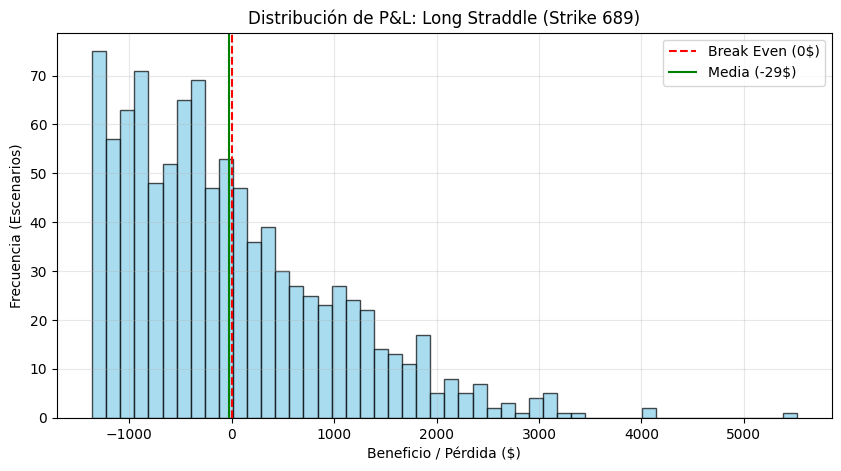

In [ ]:
# ==============================================================================
# PUNTO 1: ESTRATEGIA LONG STRADDLE (Simulación de Montecarlo)
# ==============================================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ------------------------------------------------------------------------------
# 1. CONFIGURACIÓN Y CALIBRACIÓN (Usando tus datos cargados)
# ------------------------------------------------------------------------------
# Recuperamos los datos del DataFrame 'df_spy' y variables calculadas previamente
K_atm = 689 # Strike ATM
T_days = 18 # Horizonte temporal (días)
T_year = T_days / 365.0
r = 0.04    # Tasa libre riesgo
q = 0.00    # Dividendos

# Precios reales de mercado para el Straddle hoy
row_atm = df_spy[df_spy['strike'] == K_atm].iloc[0]
cost_call_mkt = row_atm['call_mid']
cost_put_mkt  = row_atm['put_mid']
cost_straddle = (cost_call_mkt + cost_put_mkt) * 100 # Coste total por 1 contrato (x100), debido a que cada contrato tiene 100 acciones

# Calibración de Volatilidad Implícita (Sigma) necesaria para simular el futuro
# Usamos tu función 'implied_vol_bisect'
sigma_sim = implied_vol_bisect(cost_call_mkt, S0, K_atm, T_year, r, q, "C")

print(f"--- Configuración Estrategia Long Straddle ---")
print(f"Spot Inicial (S0):   {S0:.2f} $")
print(f"Strike (K):          {K_atm} $")
print(f"Volatilidad (Sigma): {sigma_sim:.2%}")
print(f"Coste Entrada:       {cost_straddle:.2f} $ (Prima Call + Prima Put)")

# ------------------------------------------------------------------------------
# 2. MOTOR DE SIMULACIÓN (Generar 1.000 escenarios futuros)
# ------------------------------------------------------------------------------
np.random.seed(42)
N_SIMS = 1000 
results_straddle = []

# Proyectamos el precio final (S_T) a 18 días usando Movimiento Browniano Geométrico
# S_T = S0 * exp(...)
z = np.random.standard_normal(N_SIMS)
drift = (r - q - 0.5 * sigma_sim**2) * T_year # La tendencia. El mercado tiende a subir muy despacio.
diffusion = sigma_sim * np.sqrt(T_year) * z # Es el ruido, la volatilidad multiplicada por el azar, si la vloatilidad es alta, el ruido será fuerte.
simulated_prices_T = S0 * np.exp(drift + diffusion)

# ------------------------------------------------------------------------------
# 3. LÓGICA DE LA ESTRATEGIA (Cálculo de Payoff y P&L)
# ------------------------------------------------------------------------------
for S_final in simulated_prices_T:
    
    # A. Valor al Vencimiento (Payoff)
    # Ganamos si el precio sube por encima de K (Call) o baja por debajo de K (Put)
    value_call = max(S_final - K_atm, 0)
    value_put  = max(K_atm - S_final, 0)
    total_payoff = (value_call + value_put) * 100 # Multiplicador x100
    
    # B. Beneficio Neto (P&L)
    # Lo que vale al final menos lo que pagamos al principio
    pnl = total_payoff - cost_straddle
    
    results_straddle.append({
        "S_Final": S_final,
        "Payoff": total_payoff,
        "PnL": pnl
    })

# Convertimos a DataFrame para analizar
df_straddle = pd.DataFrame(results_straddle)

# ------------------------------------------------------------------------------
# 4. ANÁLISIS DE RESULTADOS
# ------------------------------------------------------------------------------
mean_pnl = df_straddle['PnL'].mean()
win_rate = (df_straddle['PnL'] > 0).mean()

print(f"\n--- Resultados Esperados (Long Straddle) ---")
print(f"Beneficio Medio (Esperanza): {mean_pnl:.2f} $")
print(f"Probabilidad de Ganancia:    {win_rate:.2%}")
print(f"Peor escenario (Pérdida Máx):{df_straddle['PnL'].min():.2f} $")
print(f"Mejor escenario:             {df_straddle['PnL'].max():.2f} $")

# Gráfico de Distribución
plt.figure(figsize=(10, 5))
plt.hist(df_straddle['PnL'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(0, color='red', linestyle='--', label='Break Even (0$)')
plt.axvline(mean_pnl, color='green', linestyle='-', label=f'Media ({mean_pnl:.0f}$)')
plt.title(f"Distribución de P&L: Long Straddle (Strike {K_atm})")
plt.xlabel("Beneficio / Pérdida ($)")
plt.ylabel("Frecuencia (Escenarios)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()